# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-01-06 17:46:29--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.004s  

2023-01-06 17:46:29 (14.3 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,107,85,39,77,151,59,8,150,45,19,134,176,331,133,73,0,16,184,193
1,717,96,46,74,202,74,5,163,39,20,149,185,408,191,70,7,8,196,200
2,214,89,36,72,141,56,7,138,48,18,126,163,286,130,72,1,1,187,192
3,505,115,53,100,205,64,11,220,30,25,166,229,710,214,71,21,11,189,199
4,198,81,46,71,130,56,7,153,44,19,149,172,342,191,81,3,14,180,186
5,93,94,48,87,162,64,10,157,43,20,161,179,363,186,75,4,15,184,195
6,577,99,54,100,199,62,9,200,33,23,166,222,600,241,70,2,7,189,198
7,323,98,51,96,203,66,10,188,35,22,157,207,533,231,68,10,1,191,199
8,89,80,37,57,116,55,6,125,54,18,125,142,229,132,81,8,5,178,184
9,321,113,57,109,194,56,6,260,26,28,175,288,982,261,85,11,21,182,183


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.746812,93.331512,44.659381,81.845173,167.854281,61.581056,8.562842,167.874317,41.089253,20.493625,147.479053,188.080146,434.342441,174.233151,72.639344,6.355191,12.659381,188.816029,195.535519
std,242.781028,8.095198,6.009922,15.495575,33.801221,8.397041,4.675820,32.419815,7.605058,2.530553,14.121540,31.108430,172.486367,32.338373,7.680503,4.744905,9.006415,6.188407,7.468982
min,0.000000,77.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,227.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,34.000000,19.000000,137.000000,168.000000,320.000000,150.000000,68.000000,3.000000,5.000000,184.000000,191.000000
50%,427.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,177.000000,361.000000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,637.000000,99.000000,49.000000,96.000000,193.000000,65.000000,10.000000,196.000000,46.000000,23.000000,158.000000,216.000000,576.000000,197.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [105]:
# сделаем стандартизацию оставив нулевые данные - она нужна для PCA и логрега
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_test_pd = pd.DataFrame(X_test)
x_scaled = min_max_scaler.fit_transform(X_train_pd)
X_train_pd_scaled = pd.DataFrame(x_scaled)
X_test_pd_scaled = pd.DataFrame(min_max_scaler.transform(X_test_pd))

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [106]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [107]:
# Проведем подбор гиперпараметров с помощью кросс-валидации

for i in [0.5,1,1.5,2,2.5,3,3.5,6]:

    log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = i)
    
    print(f'For regularization coef {i} score = {np.mean(cross_val_score(log_reg, X_train_pd_scaled, y_train, cv=cv, scoring="f1_macro"))}')

For regularization coef 0.5 score = 0.6211104672579336
For regularization coef 1 score = 0.6603961004011595
For regularization coef 1.5 score = 0.686235182257213
For regularization coef 2 score = 0.7000481701365171
For regularization coef 2.5 score = 0.706268980511796
For regularization coef 3 score = 0.7087937032954252
For regularization coef 3.5 score = 0.7081515452011493
For regularization coef 6 score = 0.7158559335407364


In [108]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = 6)
log_reg.fit(X_train_pd_scaled,y_train)

y_pred = log_reg.predict(X_test_pd_scaled)
y_pred_proba = log_reg.predict_proba(X_test_pd_scaled)

In [109]:
print('accuracy_score: ',accuracy_score(y_test, y_pred))
print('f1_score: ',f1_score(y_test, y_pred, average='weighted'))


accuracy_score:  0.7003367003367004
f1_score:  0.6820916183929882


In [110]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


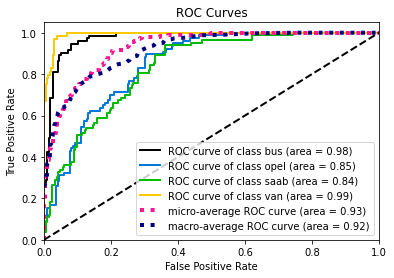

In [111]:
from scikitplot.metrics import plot_roc
plot_roc(y_test, y_pred_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
### YOUR CODE HERE

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

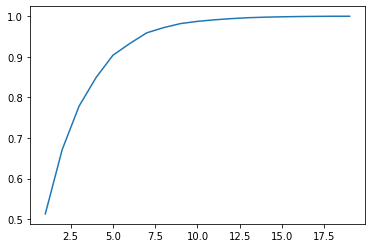

In [113]:
pca = PCA()
pca.fit(X_train_pd_scaled)
exp_D_cum = np.cumsum(pca.explained_variance_ratio_)


sns.lineplot(x=range(1, exp_D_cum.shape[0] + 1), y=exp_D_cum)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [114]:
### YOUR CODE HERE
# Возьмем 12 компонент, так как explained_variance уже достаточно велико
# нормализация нужна, т.к. величиная дисперсии влияет на "главность" компонент

pca = PCA(n_components = 12)
X_train_pca = pca.fit_transform(X_train_pd_scaled)
X_test_pca = pca.transform(X_test_pd_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [115]:
### YOUR CODE HERE
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Проведем подбор гиперпараметров с помощью крос валидации

for i in [0.5,1,1.5,2,2.5,3,3.5,6]:

    log_reg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = i)
    
    print(f'For regularization coef {i} score = {np.mean(cross_val_score(log_reg_pca, X_train_pca, y_train, cv=cv, scoring="f1_macro"))}')

For regularization coef 0.5 score = 0.6139604775119574
For regularization coef 1 score = 0.6519725793421832
For regularization coef 1.5 score = 0.669685425353536
For regularization coef 2 score = 0.6842972883775735
For regularization coef 2.5 score = 0.6880375208363505
For regularization coef 3 score = 0.6920880804613155
For regularization coef 3.5 score = 0.6960521166008536
For regularization coef 6 score = 0.7032901271487043


In [116]:
log_reg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = 6)
log_reg_pca.fit(X_train_pca,y_train)

y_pred_pca = log_reg_pca.predict(X_test_pca)
y_pred_proba_pca = log_reg_pca.predict_proba(X_test_pca)

In [117]:
print('accuracy_score: ',accuracy_score(y_test, y_pred_pca))
print('f1_score: ',f1_score(y_test, y_pred_pca, average='weighted'))

accuracy_score:  0.7003367003367004
f1_score:  0.6825602012764221


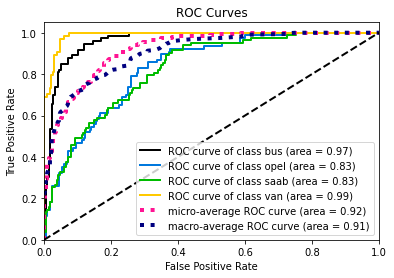

In [118]:
plot_roc(y_test, y_pred_proba_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Проведем подбор гиперпараметров с помощью крос валидации

for i in range(1,20):

    d_tree = DecisionTreeClassifier(max_depth=i, random_state=1)
    
    print(f'For max_depth {i} score = {np.mean(cross_val_score(d_tree, X_train, y_train, cv=cv, scoring="f1_macro"))}')

For max_depth 1 score = 0.25853248950866325
For max_depth 2 score = 0.4691156517745247
For max_depth 3 score = 0.5814872581652885
For max_depth 4 score = 0.6384317908568219
For max_depth 5 score = 0.6709028781649794
For max_depth 6 score = 0.6616527623805144
For max_depth 7 score = 0.6504637512149666
For max_depth 8 score = 0.6576041378212407
For max_depth 9 score = 0.6468135697964184
For max_depth 10 score = 0.6533221225773975
For max_depth 11 score = 0.6539569553493436
For max_depth 12 score = 0.6533374415163282
For max_depth 13 score = 0.6565139161024911
For max_depth 14 score = 0.6592967512164922
For max_depth 15 score = 0.6636579639453304
For max_depth 16 score = 0.6654599101276277
For max_depth 17 score = 0.6654599101276277
For max_depth 18 score = 0.6654599101276277
For max_depth 19 score = 0.6654599101276277


In [121]:
d_tree = DecisionTreeClassifier(max_depth = 15, random_state=1)
d_tree.fit(X_train,y_train)

y_pred = d_tree.predict(X_test)
y_pred_proba = d_tree.predict_proba(X_test)

In [122]:
print('accuracy_score: ',accuracy_score(y_test, y_pred))
print('f1_score: ',f1_score(y_test, y_pred, average='weighted'))


accuracy_score:  0.6801346801346801
f1_score:  0.6777025151767373


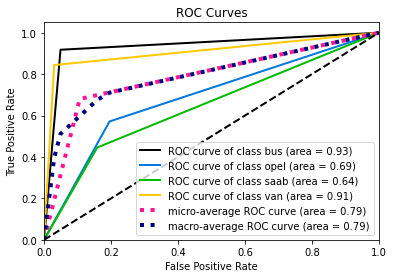

In [123]:
plot_roc(y_test, y_pred_proba)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [124]:
from sklearn.ensemble import BaggingClassifier

Для лог рега:

In [125]:
acc_dict = {}
f1_dict = {}
for i in range(2,100,5):
    linear_bag = BaggingClassifier(base_estimator=log_reg,
                             n_estimators=i, random_state=0, n_jobs=4).fit(X_train_pd_scaled,y_train)

    y_pred = linear_bag.predict(X_test_pd_scaled)
    
    acc_dict[i] = accuracy_score(y_test, y_pred)
    f1_dict[i] = f1_score(y_test, y_pred, average='weighted')

In [126]:
import operator
best_acc  = max(acc_dict.items(), key=operator.itemgetter(1))[0]
best_f1 = max(f1_dict.items(), key=operator.itemgetter(1))[0]
print(f'Наилучший (accuracy) ансамбль логрегов состоит из {best_acc} моделей')
print(f'Наилучший (f1) ансамбль логрегов состоит из {best_f1} моделей')

Наилучший (accuracy) ансамбль логрегов состоит из 12 моделей
Наилучший (f1) ансамбль логрегов состоит из 12 моделей


In [127]:
print(f'accuracy = {acc_dict[best_acc]}')

print(f'f1 = {f1_dict[best_f1]}')

accuracy = 0.7306397306397306
f1 = 0.7149832713051104


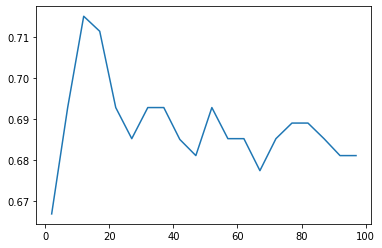

In [128]:
lists = sorted(f1_dict.items())
x_f1, y_f1 = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_f1)
plt.show()

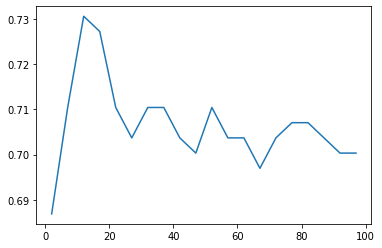

In [129]:
lists = sorted(acc_dict.items())
x_acc, y_acc = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_acc)
plt.show()

для деревьев:

In [140]:
acc_dict = {}
f1_dict = {}
for i in range(2,100,5):
    tree_bag = BaggingClassifier(base_estimator=d_tree,
                             n_estimators=i, random_state=0, n_jobs=4).fit(X_train_pd_scaled,y_train)

    y_pred = tree_bag.predict(X_test_pd_scaled)
    
    acc_dict[i] = accuracy_score(y_test, y_pred)
    f1_dict[i] = f1_score(y_test, y_pred, average='weighted')

In [141]:
import operator
best_acc  = max(acc_dict.items(), key=operator.itemgetter(1))[0]
best_f1 = max(f1_dict.items(), key=operator.itemgetter(1))[0]
print(f'Наилучший (accuracy) ансамбль деревьев состоит из {best_acc} моделей')
print(f'Наилучший (f1) ансамбль деревьев состоит из {best_f1} моделей')

Наилучший (accuracy) ансамбль деревьев состоит из 12 моделей
Наилучший (f1) ансамбль деревьев состоит из 12 моделей


In [142]:
print(f'accuracy = {acc_dict[best_acc]}')

print(f'f1 = {f1_dict[best_f1]}')

accuracy = 0.734006734006734
f1 = 0.7273467450289434


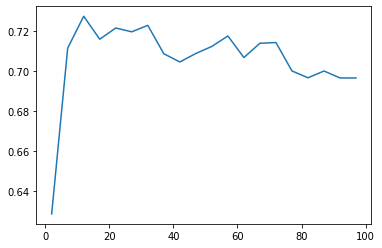

In [143]:
lists = sorted(f1_dict.items())
x_f1, y_f1 = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_f1)
plt.show()

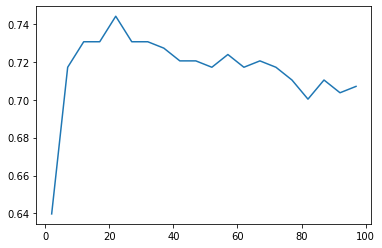

In [133]:
lists = sorted(acc_dict.items())
x_acc, y_acc = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_acc)
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
acc_dict = {}
f1_dict = {}
for i in range(2,100,5):
    rand_for = RandomForestClassifier(n_estimators=i ,max_depth = 15, random_state=1)
    rand_for.fit(X_train,y_train)
    
    y_pred = rand_for.predict(X_test)

    acc_dict[i] = accuracy_score(y_test, y_pred)
    f1_dict[i] = f1_score(y_test, y_pred, average='weighted')

In [145]:
best_acc  = max(acc_dict.items(), key=operator.itemgetter(1))[0]
best_f1 = max(f1_dict.items(), key=operator.itemgetter(1))[0]
print(f'Наилучший (accuracy) RandomForest получает из {best_acc} деревьев, точность составила {acc_dict[best_acc]}')
print(f'Наилучший (f1) RandomForest получает из {best_f1} деревьев точность составила {f1_dict[best_f1]}')

Наилучший (accuracy) RandomForest получает из 42 деревьев, точность составила 0.7508417508417509
Наилучший (f1) RandomForest получает из 82 деревьев точность составила 0.743487967077291


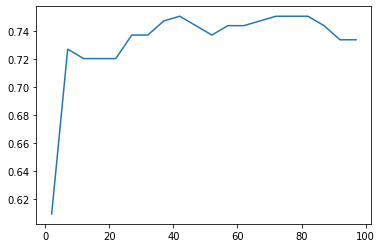

In [137]:
lists = sorted(acc_dict.items())
x_acc, y_acc = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_acc)
plt.show()

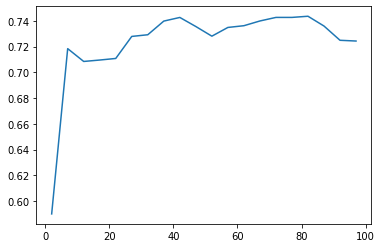

In [138]:
lists = sorted(f1_dict.items())
x_f1, y_f1 = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_f1)
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = 6)
D_tree = DecisionTreeClassifier(max_depth = 15, random_state=1)
rand_for = RandomForestClassifier(n_estimators=42 ,max_depth = 15, random_state=1)

In [ ]:
import math

def spliter(df, n):
    
    df_dict = dict()
    step = math.ceil(df.shape[0]/n)
    left = 0
    right = step
    for i in range(n):
        df_dict[i] = df[left:right]
        left = right
        right += step
    return df_dict

In [ ]:
X_dict = spliter(X_train, 10)
y_dict = spliter(y_train, 10)

In [ ]:
acc_dict_tree = {}
f1_dict_tree = {}
for i in range(10):
    X_concat = np.concatenate([X_dict[j] for j in range(0,i+1)])
    y_concat = np.concatenate([y_dict[j] for j in range(0,i+1)])
    D_tree.fit(X_concat, y_concat)
    
    y_pred = D_tree.predict(X_test)
    acc_dict_tree[i] = accuracy_score(y_test, y_pred)
    f1_dict_tree[i] = f1_score(y_test, y_pred, average='weighted')

In [146]:
acc_dict_rand_for = {}
f1_dict_rand_for = {}
for i in range(10):
    X_concat = np.concatenate([X_dict[j] for j in range(0,i+1)])
    y_concat = np.concatenate([y_dict[j] for j in range(0,i+1)])
    rand_for.fit(X_concat, y_concat)
    
    y_pred = rand_for.predict(X_test)
    acc_dict_rand_for[i] = accuracy_score(y_test, y_pred)
    f1_dict_rand_for[i] = f1_score(y_test, y_pred, average='weighted')

In [147]:
X_dict_scaled = spliter(X_train_pd_scaled, 10)

In [148]:
acc_dict_lin = {}
f1_dict_lin = {}
for i in range(10):
    X_concat = np.concatenate([X_dict_scaled[j] for j in range(0,i+1)])
    y_concat = np.concatenate([y_dict[j] for j in range(0,i+1)])
    log_reg.fit(X_concat, y_concat)
    
    y_pred = log_reg.predict(X_test_pd_scaled)
    acc_dict_lin[i] = accuracy_score(y_test, y_pred)
    f1_dict_lin[i] = f1_score(y_test, y_pred, average='weighted')

In [ ]:
acc_dict_lin.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [152]:
for_plot_acc = pd.DataFrame()
for_plot_acc['iteration'] = list(acc_dict_lin.keys())
for_plot_acc['tree'] = list(acc_dict_tree.values())
for_plot_acc['random_for'] = list(acc_dict_rand_for.values())
for_plot_acc['log_reg'] = list(acc_dict_lin.values())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


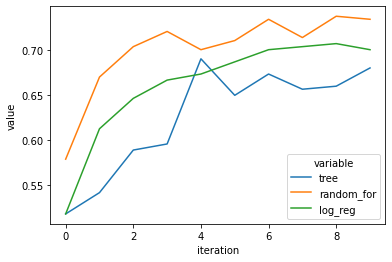

In [153]:
sns.lineplot('iteration', 'value', hue='variable', 
             data=pd.melt(for_plot_acc, 'iteration'))
plt.show()

In [155]:
for_plot_f1 = pd.DataFrame()
for_plot_f1['iteration'] = list(f1_dict_lin.keys())
for_plot_f1['tree'] = list(f1_dict_tree.values())
for_plot_f1['random_trees'] = list(f1_dict_rand_for.values())
for_plot_f1['log_reg'] = list(f1_dict_lin.values())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


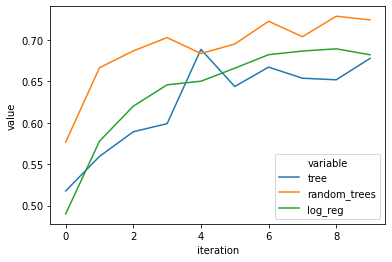

In [156]:
sns.lineplot('iteration', 'value', hue='variable', 
             data=pd.melt(for_plot_f1, 'iteration'))
plt.show()

Увеличение выборки способствует увеличению точности.

Сильнее всего это заметно на решающем дереве, так как увеличение выборки - это единственный вариант снизить variance.

На случайных деревьях эффект ниже, так как variance снижается за счет бутсрапа и случайной выборки фичей.

Логрег обладает наименьшим эффектом, так как увлеличение выборки не способствует снижению смещения (к примеру, возможно, есть пропущенная переменная и увеличение кол-ва наблюдений не приведет к исправлению этого факта)